In [1]:

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [2]:

!ls

cGANEnglishGithub.ipynb  cGANOrig.ipynb  m	  modelosSeparadosPorCarpeta
cGAN.ipynb		 imagen		 modelos


para sacar el arreglo que contenga los nombres de todas las ubicaciones de las imagenes

In [9]:
import os
import re

# ListaArchivos() returns a list of image path pairs:
# - Each pair contains the path to a distorted image (blurred/stabilized)
# - And the corresponding path to its original ground truth image
def ListaArchivos():
    """
    Builds a list of image path pairs for training or evaluation.

    Each element in the returned list is a pair:
        [path_to_distorted_image, path_to_ground_truth_image]

    The function walks through a directory structure containing 
    distorted/stabilized images and matches them to ground truth images
    by parsing filenames.

    Returns:
        List[List[str, str]]: List of [blur_path, groundtruth_path] pairs
    """

    # Base path to blurred/stabilized images (grouped by stabilization method and distance L)
    base = "/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50"
    stabilization_folders = os.listdir(base)

    # Path to original ground truth images
    ground_truth_dir = "/media/Data/SOTIS/Groundtruth/EurasianCitiesGT"

    # Final list of image path pairs
    RutasArchivos = []

    # Loop through each stabilization method (e.g., Gaussian, Denoise, etc.)
    for method in stabilization_folders:
        method_path = os.path.join(base, method)
        scene_folders = os.listdir(method_path)

        # Loop through scenes (e.g., each city or video scene)
        for scene in scene_folders:
            scene_path = os.path.join(method_path, scene)
            distance_folders = os.listdir(scene_path)

            # Loop through distance folders (e.g., L1000, L2000)
            for L_folder in distance_folders:
                L_path = os.path.join(scene_path, L_folder)
                image_files = os.listdir(L_path)

                for imagenB in image_files:
                    # Only process .png images
                    if imagenB.endswith(".png"):
                        nombreImg = re.split('_', imagenB)
                        a = list(nombreImg[1])

                        # Heuristic to choose index for original image name
                        if len(a) > 2 and a[2].isnumeric():
                            index = 1
                        else:
                            index = 2

                        # Construct full paths
                        rutaImgOrig = os.path.join(ground_truth_dir, nombreImg[index] + '.png')
                        rutaFinal = os.path.join(L_path, imagenB)

                        # Append pair to list
                        ParImagenes = [rutaFinal, rutaImgOrig]
                        RutasArchivos.append(ParImagenes)

    return RutasArchivos


In [10]:
import os
import re

# ListaArchivosSeparadas(indicador) returns a list of image path pairs.
# RutasArchivos[i][0] is the path to the distorted (blurred) image.
# RutasArchivos[i][1] is the path to its corresponding original (ground truth) image.
def ListaArchivosSeparadas(indicador):
    """
    Builds a list of image path pairs for a specific stabilization method 
    (e.g., Gaussian, Wiener, etc.) based on the index provided.

    Each pair consists of:
        - The path to a distorted/stabilized image.
        - The corresponding ground truth image.

    Args:
        indicador (int): Index of the stabilization method folder to use.

    Returns:
        List[List[str, str]]: A list of [blur_path, groundtruth_path] pairs.
    """

    # Base path for stabilized (blurred) images
    base = "/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50"
    stabilization_folders = os.listdir(base)

    # Path to original ground truth images
    ground_truth_dir = "/media/Data/SOTIS/Groundtruth/EurasianCitiesGT"

    image_pairs = []

    # Select only the indicated stabilization method (e.g., Gaussian, Median, etc.)
    folder_name = stabilization_folders[indicador]
    method_path = os.path.join(base, folder_name)
    scene_folders = os.listdir(method_path)

    # Loop through scenes (e.g., each city or video scene)
    for scene in scene_folders:
        scene_path = os.path.join(method_path, scene)
        distance_folders = os.listdir(scene_path)

        # Loop through distance folders (e.g., L1000, L2000)
        for L_folder in distance_folders:
            L_path = os.path.join(scene_path, L_folder)
            image_files = os.listdir(L_path)

            for image_file in image_files:
                # Skip non-PNG files (.mat, etc.)
                if not image_file.endswith(".png"):
                    continue

                name_parts = re.split('_', image_file)
                chars = list(name_parts[1])

                # Heuristic to determine the correct index for ground truth name
                if len(chars) > 2 and chars[2].isnumeric():
                    index = 1
                else:
                    index = 2

                # Construct full paths
                distorted_image_path = os.path.join(L_path, image_file)
                ground_truth_path = os.path.join(ground_truth_dir, name_parts[index] + '.png')

                image_pairs.append([distorted_image_path, ground_truth_path])

    return image_pairs


In [11]:
a=ListaArchivosSeparadas(3)

print(a[1])

['/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50/Temporal_Average/024-2/L2000/Temporal_Average_024-2_L=2000.000000_D=0.0540_d=0.300_Cn2=1e-15.png', '/media/Data/SOTIS/Groundtruth/EurasianCitiesGT/024-2.png']


In [12]:
base = "/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50"
listaCarpetasB = os.listdir(base) 
print(listaCarpetasB)

['NLTV-LK', 'NLTV-TVL1', 'TV-LK', 'Temporal_Average', 'TV-TVL1']


/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50/NLTV-LK/024-2/L2000/NLTV-LK_024-2_L=2000.000000_D=0.0540_d=0.300_Cn2=7e-17.png
86000


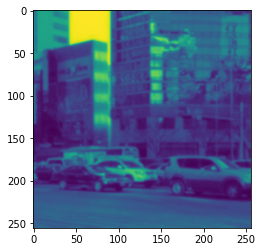

(256, 256)


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image # esto es para guardar la imagen 

RutasArchivos = ListaArchivos()
print(RutasArchivos[0][0])
print(len(RutasArchivos))

img = mpimg.imread(RutasArchivos[1110][0])

plt.imshow(img)
plt.show() 
print(img.shape)

In [16]:
# Tensorflow / Keras

from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model, load_model # for assembling a Neural Network model
from keras.layers import Input, Dense, Embedding, Reshape, Concatenate, Flatten, Dropout # for adding layers
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, ReLU, LeakyReLU # for adding layers
from tensorflow.keras.utils import plot_model # for plotting model diagram
from tensorflow.keras.optimizers import Adam # for model optimization 

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for data visualizationa
print('matplotlib: %s' % matplotlib.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])


Tensorflow/Keras: 2.13.1
numpy: 1.21.5
matplotlib: 3.5.1


In [17]:

def deleteBorde(inputs):

    return tf.image.central_crop(inputs, 0.96)
    


In [18]:
class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [19]:
import tensorflow as tf
from keras.layers import Input, Conv2D, Activation, BatchNormalization
# from keras.layers.merge import Add
from tensorflow.keras.layers import Add
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from tensorflow.keras.layers import Layer, InputSpec

class ReflectionPadding2D(Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        self.input_spec = [InputSpec(ndim=1)]
        super(ReflectionPadding2D, self).__init__(**kwargs)
        
    def get_config(self):
        config = super().get_config()
        config.update({
            "padding": self.padding,
        })
        return config

    def compute_output_shape(self, s):
        """ If you are using "channels_last" configuration"""
        return (s[0], s[1] + 2 * self.padding[0], s[2] + 2 * self.padding[1], s[3])

    def call(self, x, mask=None):
        w_pad,h_pad = self.padding
        return tf.pad(x, [[0,0], [h_pad,h_pad], [w_pad,w_pad], [0,0] ], 'REFLECT')

In [20]:
from keras.layers import Input, Conv2D, Activation, BatchNormalization
from keras.layers import Add
from keras.layers.core import Dropout

def res_block(input, filters, kernel_size=(3,3), strides=(1,1), use_dropout=False):
    """
    Instanciate a Keras Resnet Block using sequential API.
    :param input: Input tensor
    :param filters: Number of filters to use
    :param kernel_size: Shape of the kernel for the convolution
    :param strides: Shape of the strides for the convolution
    :param use_dropout: Boolean value to determine the use of dropout
    :return: Keras Model
    """
    x = ReflectionPadding2D((1,1))(input)
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if use_dropout:
        x = Dropout(0.3)(x)

    x = ReflectionPadding2D((1,1))(x)
    x = Conv2D(filters=filters,
                kernel_size=kernel_size,
                strides=strides,)(x)
    x = BatchNormalization()(x)

    # Two convolution layers followed by a direct connection between input and output
    merged = Add()([input, x])
    return merged

In [21]:
from keras.layers import Input, Conv2D, Activation, BatchNormalization
from keras.layers import Add
from keras.layers.core import Dropout

def res_blockTrans(input, filters, kernel_size=(3,3), strides=(1,1), use_dropout=False):
    """
    Instanciate a Keras Resnet Block using sequential API.
    :param input: Input tensor
    :param filters: Number of filters to use
    :param kernel_size: Shape of the kernel for the convolution
    :param strides: Shape of the strides for the convolution
    :param use_dropout: Boolean value to determine the use of dropout
    :return: Keras Model
    """
    g = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(input)
    #x = BatchNormalization()(x)
    g = Activation('relu')(g)

    if use_dropout:
        g = Dropout(0.3)(g)

    x = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(g)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Two convolution layers followed by a direct connection between input and output
    merged = Add()([input, x])
    return merged

In [47]:
def generator(in_shape=(256,256,1)):
        

    entrada = Input(shape=in_shape, name='Generator-Image-Input-Layer')
    
    #g = ReflectionPadding2D((3, 3))(entrada)
    g = ReflectionPadding2D((5, 5))(entrada)
    
    # Hidden Layer 1
    g = Conv2DTranspose(filters=8, kernel_size=(3,3), strides=(1,1), padding='same',name='Generator-Hidden-Layer-0')(g)
    g = ReLU(name='Generator-Hidden-Layer-Activation-0')(g)
    
    g = res_block(g, 8, use_dropout=True)
    #g = res_block(g, 8, use_dropout=True)
      
    g = Conv2DTranspose(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', name='Generator-Hidden-Layer-1')(g)
    g = ReLU(name='Generator-Hidden-Layer-Activation-1')(g)
    
    g = res_blockTrans(g, 16, use_dropout=True)
    g = res_blockTrans(g, 16, use_dropout=True)

    
    # Hidden Layer 2
    g = Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', name='Generator-Hidden-Layer-2')(g)
    g = ReLU(name='Generator-Hidden-Layer-Activation-2')(g)
    
    g = Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', name='Generator-Hidden-Layer-3')(g)
    g = ReLU(name='Generator-Hidden-Layer-Activation-3')(g)
    
#     g = Lambda(lambda z: z[2:256][2:256])(g)
    
    g = Lambda(deleteBorde)(g)
    
    # Output Layer (Note, we use only one filter because we have a greysclae image. Color image would have three
    output_layer = Conv2D(filters=1, kernel_size=(1,1), activation='tanh', padding='same', name='Generator-Output-Layer')(g)
    
    # Define model
    model = Model(entrada, output_layer, name='Generator')

    # Compile the model
    #model.compile(loss='MeanSquaredError', optimizer=Adam(learning_rate=0.000095, beta_1=0.8), metrics=['accuracy']) esta es
    model.compile(loss='MeanSquaredError', optimizer=Adam(learning_rate=0.0000035, beta_1=0.8), metrics=['accuracy'])
    #loss = wasserstein_loss
    loss = 'MeanSquaredError'
    return model

# Instantiate
gen_model = generator()
# 
# Show model summary and plot model diagram
gen_model.summary()


Model: "Generator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Generator-Image-Input-Laye  [(None, 256, 256, 1)]        0         []                            
 r (InputLayer)                                                                                   
                                                                                                  
 reflection_padding2d_12 (R  (None, 266, 266, 1)          0         ['Generator-Image-Input-Layer[
 eflectionPadding2D)                                                0][0]']                       
                                                                                                  
 Generator-Hidden-Layer-0 (  (None, 266, 266, 8)          80        ['reflection_padding2d_12[0][0
 Conv2DTranspose)                                                   ]']                   

 Generator-Hidden-Layer-Act  (None, 266, 266, 32)         0         ['Generator-Hidden-Layer-2[0][
 ivation-2 (ReLU)                                                   0]']                          
                                                                                                  
 Generator-Hidden-Layer-3 (  (None, 266, 266, 64)         18496     ['Generator-Hidden-Layer-Activ
 Conv2DTranspose)                                                   ation-2[0][0]']               
                                                                                                  
 Generator-Hidden-Layer-Act  (None, 266, 266, 64)         0         ['Generator-Hidden-Layer-3[0][
 ivation-3 (ReLU)                                                   0]']                          
                                                                                                  
 lambda_4 (Lambda)           (None, 256, 256, 64)         0         ['Generator-Hidden-Layer-Activ
          

In [128]:
#gen_model.save('prueba borrar sebas.h5')

1/1 [==============================] - 0s 11ms/step
generated


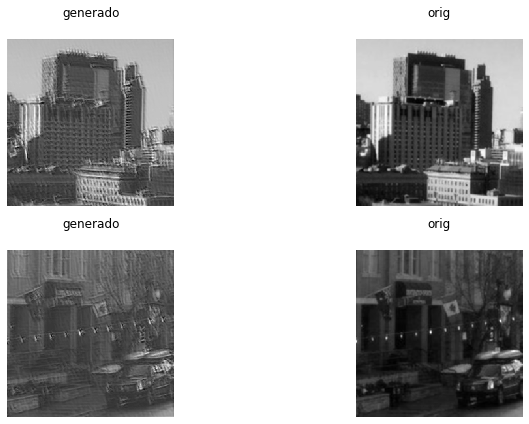

In [52]:

#GAN models are very dependant on initial parameter to converge, check that initial generate images are ok before going to train
#bad initializations will usually look like color inverted images
show_fakes(RutasArchivos,gen_model,2)

#if is a bad model then delet it and create it again you can use:
#del gen_model

In [53]:
import keras.backend as K
from tensorflow.keras.applications import VGG16
from keras.models import Model
def perceptual_loss(y_true, y_pred):

    vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
    loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)
    loss_model.trainable = False
    return K.mean(K.square(loss_model(y_true) - loss_model(y_pred)))

In [54]:
import keras.backend as K

def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true*y_pred)

In [60]:
def discriminator(in_shape=(256,256,1)):
    


    # Image Inputs
    in_image = Input(shape=in_shape, name='Discriminator-Image-Input-Layer')
    
    
    h = Conv2D(filters=8, kernel_size=(3,3), strides=(2,2), padding='same', name='Discriminator-Hidden-Layer-0a')(in_image)
    h = LeakyReLU(alpha=0.2, name='Discriminator-Hidden-Layer-Activation-0a')(h)
    
    
        # Hidden Layer 0
    h = Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding='same', name='Discriminator-Hidden-Layer-0')(h)
    h = LeakyReLU(alpha=0.2, name='Discriminator-Hidden-Layer-Activation-0')(h)
    

    # Hidden Layer 1
    h = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', name='Discriminator-Hidden-Layer-1')(h)
    h = LeakyReLU(alpha=0.2, name='Discriminator-Hidden-Layer-Activation-1')(h)
    
    # Hidden Layer 2
    h = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', name='Discriminator-Hidden-Layer-2')(h)
    h = LeakyReLU(alpha=0.2, name='Discriminator-Hidden-Layer-Activation-2')(h)
    h = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid', name='Discriminator-MaxPool-Layer-2')(h) # Max Pool
    
    # Flatten and Output Layers
    h = Flatten(name='Discriminator-Flatten-Layer')(h) # Flatten the shape
    h = Dropout(0.2, name='Discriminator-Flatten-Layer-Dropout')(h) # Randomly drop some connections for better generalization
    
    h = Dense(240, activation='tanh')(h)
    output_layer = Dense(1, activation='sigmoid', name='Discriminator-Output-Layer')(h) # Output Layer
    
    # Define model
    model = Model(in_image, output_layer, name='Discriminator')
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00095, beta_1=0.8), metrics=['accuracy'])
    #loss = wasserstein_loss
    loss = 'binary_crossentropy'
    #model.compile(loss=loss, optimizer=Adam(learning_rate=1E-5, beta_1=0.8, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])
    return model

# Instantiate
dis_model = discriminator()

# Show model summary and plot model diagram
dis_model.summary()

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator-Image-Input-  [(None, 256, 256, 1)]     0         
 Layer (InputLayer)                                              
                                                                 
 Discriminator-Hidden-Layer  (None, 128, 128, 8)       80        
 -0a (Conv2D)                                                    
                                                                 
 Discriminator-Hidden-Layer  (None, 128, 128, 8)       0         
 -Activation-0a (LeakyReLU)                                      
                                                                 
 Discriminator-Hidden-Layer  (None, 64, 64, 16)        1168      
 -0 (Conv2D)                                                     
                                                                 
 Discriminator-Hidden-Layer  (None, 64, 64, 16)      

In [69]:
def def_gan(generator, discriminator):
    
    # We don't want to train the weights of discriminator at this stage. Hence, make it not trainable
    discriminator.trainable = False
    
    # Get Generator inputs / outputs
    gen_latent = generator.input # Latent and label inputs from the generator
    gen_output = generator.output # Generator output image
    
    # Connect image and label from the generator to use as input into the discriminator
    gan_output = discriminator(gen_output)
    
    # Define GAN model
    model = Model(gen_latent, gan_output, name="cDCGAN")
    
    # Compile the model
#     binary=keras.losses.BinaryCrossentropy(from_logits=False) #este era el anterior inicial
    losss='binary_crossentropy'
#     model.compile(loss=losss, optimizer=Adam(learning_rate=0.00005, beta_1=0.8)) esta es la buena
#     model.compile(loss=losss, optimizer=Adam(learning_rate=0.0005, beta_1=0.8))
#     d_on_g_opt=Adam(learning_rate=0.00005, beta_1=0.8)
#     loss = binary
    model.compile(loss=losss, optimizer=Adam(learning_rate=0.00005, beta_1=0.8))
    return model

# Instantiate
gan_model = def_gan(gen_model, dis_model)

# Show model summary and plot model diagram
gan_model.summary()

Model: "cDCGAN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Generator-Image-Input-Laye  [(None, 256, 256, 1)]        0         []                            
 r (InputLayer)                                                                                   
                                                                                                  
 reflection_padding2d_15 (R  (None, 266, 266, 1)          0         ['Generator-Image-Input-Layer[
 eflectionPadding2D)                                                0][0]']                       
                                                                                                  
 Generator-Hidden-Layer-0 (  (None, 266, 266, 8)          80        ['reflection_padding2d_15[0][0
 Conv2DTranspose)                                                   ]']                      

 Generator-Hidden-Layer-Act  (None, 266, 266, 32)         0         ['Generator-Hidden-Layer-2[0][
 ivation-2 (ReLU)                                                   0]']                          
                                                                                                  
 Generator-Hidden-Layer-3 (  (None, 266, 266, 64)         18496     ['Generator-Hidden-Layer-Activ
 Conv2DTranspose)                                                   ation-2[0][0]']               
                                                                                                  
 Generator-Hidden-Layer-Act  (None, 266, 266, 64)         0         ['Generator-Hidden-Layer-3[0][
 ivation-3 (ReLU)                                                   0]']                          
                                                                                                  
 lambda_5 (Lambda)           (None, 256, 256, 64)         0         ['Generator-Hidden-Layer-Activ
          

In [61]:
def cargarImagenes(rutas):
    x = []
    for i in rutas:
        ruta = i        
        fila = keras.preprocessing.image.load_img(ruta,color_mode="grayscale", target_size=(256,256))
        fila = keras.preprocessing.image.img_to_array(fila)
        x.append(fila)
        
    x = np.array([x])
    x = x.astype('float32')
    x/= 255
    x = x.squeeze(0)    
    return x
def subListaRutas(dataset,indx,tipo):
    #tipo borrosa 0 limpia 1
    subLista = []
    for i in indx:
        ruta = dataset[i][tipo]
        subLista.append(ruta)
    return subLista

In [62]:
def real_samplesImages(dataset, n):
    """
    Selects n random samples from the dataset and returns:
    - X: blurred/distorted images
    - y: corresponding clean/original images

    Args:
        dataset (list): List of [blur_path, original_path] pairs
        n (int): Number of samples to select

    Returns:
        Tuple[np.ndarray, np.ndarray]: Arrays of blurred and original images
    """
    # Randomly select n indices from the dataset
    indx = np.random.randint(0, len(dataset), n)

    # Load blurred images (column 0 in dataset pairs)
    rutas = subListaRutas(dataset, indx, 0)
    X = cargarImagenes(rutas)

    # Load corresponding original images (column 1)
    rutas = subListaRutas(dataset, indx, 1)
    y = cargarImagenes(rutas)

    return X, y


def real_samples(dataset, n):
    """
    Returns n clean/original samples and their associated label (1),
    typically used for training a discriminator.

    Args:
        dataset (list): List of [blur_path, original_path] pairs
        n (int): Number of samples to select

    Returns:
        Tuple[np.ndarray, np.ndarray]: Original images, labels
    """
    # Randomly select n indices from the dataset
    indx = np.random.randint(0, len(dataset), n)

    # Load original images (column 1 in dataset pairs)
    rutas = subListaRutas(dataset, indx, 1)
    X = cargarImagenes(rutas)

    # Label: 1 for real images
    y = np.ones((n, 1))
    return X, y


def latent_vector(dataset, n, label):
    """
    Generates latent vectors for GAN training.
    These are distorted (blurred) images from the dataset,
    used as input to the generator.

    Args:
        dataset (list): List of [blur_path, original_path] pairs
        n (int): Number of samples to select
        label (int): 1 if used to train generator (positive label),
                     0 if used to train discriminator (fake label)

    Returns:
        Tuple[np.ndarray, np.ndarray]: Latent input images, class labels
    """
    # Randomly select n indices
    indx = np.random.randint(0, len(dataset), n)

    # Load blurred images (used as input to the generator)
    rutas = subListaRutas(dataset, indx, 0)
    X = cargarImagenes(rutas)

    # Labels depend on usage context
    y = np.ones((n, 1)) if label == 1 else np.zeros((n, 1))

    return X, y


def fake_samples(dataset, generator, n):
    """
    Uses the generator to create n fake samples from real blurred inputs.

    Args:
        dataset (list): List of [blur_path, original_path] pairs
        generator (keras.Model): Trained generator model
        n (int): Number of samples to generate

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]:
            - Generated (fake) images
            - Fake labels (0s)
            - Latent inputs (blurred images)
    """
    # Generate latent inputs and corresponding (fake) labels
    latent_output, _ = latent_vector(dataset, n, label=0)

    # Generate fake images
    X = generator.predict(latent_output)

    # Labels for fake samples
    y = np.zeros((n, 1))

    return X, y, latent_output


def ParaEvaluaMSSI(dataset, generator, n):
    """
    Generates n synthetic images from blurred inputs using the generator
    and returns them along with the corresponding original and blurred images
    for metric evaluation (e.g., PSNR/SSIM).

    Args:
        dataset (list): List of [blur_path, original_path] pairs
        generator (keras.Model): Trained generator model
        n (int): Number of samples to evaluate

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]:
            - Generated images
            - Ground truth images
            - Blurred input images
    """
    # Randomly select n indices
    indx = np.random.randint(0, len(dataset), n)

    # Load blurred inputs
    rutasB = subListaRutas(dataset, indx, 0)
    XBlured = cargarImagenes(rutasB)

    # Load corresponding ground truth images
    rutasO = subListaRutas(dataset, indx, 1)
    XSinruido = cargarImagenes(rutasO)

    # Generate predictions from blurred images
    X = generator.predict(XBlured)

    return X, XSinruido, XBlured


In [21]:
import time
start_time = time.time()
[latent_output,y ]= latent_vector(RutasArchivos,1,0)
print("--- %s latent seconds ---" % (time.time() - start_time))
start_time = time.time()
X = gen_model.predict(latent_output)
print("--- %s seconds ---" % (time.time() - start_time))
print(X.shape)



--- 0.014586687088012695 latent seconds ---
1/1 [==============================] - 1s 705ms/step
--- 0.7599368095397949 seconds ---
(1, 256, 256, 1)


In [ ]:
print(X[0].shape)

In [63]:
def show_fakes(RutasArchivos,generator, n):
    
    # Get fake (generated) samples
    x_fake, y_fake, originales = fake_samples(RutasArchivos,generator,n)
    

    # Display fake (generated) images
    print('generated')
    fig, axs = plt.subplots(n, 2, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
    k=0
    for i in range(0,2):
        axs[i,0].matshow(x_fake[k], cmap='gray')
        axs[i,1].matshow(originales[k], cmap='gray')
        axs[i,0].set(title='generado')
        axs[i,1].set(title='orig')
        axs[i,0].axis('off')
        axs[i,1].axis('off')
        k=k+1
    plt.show() 
    # Display fake (original) images



In [ ]:
show_fakes(RutasArchivos,gen_model,2)

In [71]:
from datetime import datetime
def evaluar_y_guardar(modelo_generador, epoch,ssmiBlur,ssmiReconst):
    if ssmiReconst-ssmiBlur>0.2:
      # We save the model
        now = datetime.now()
        now = now.strftime("%Y%m%d_%H%M%S")
        nombre = "modelos/"+str(epoch) + '_' + str(now)+"_modelo_generador_" + "ssmiB-"+str(ssmiBlur)+ "ssmiB-"+str(ssmiReconst)+'.h5'
        modelo_generador.save(nombre)

In [73]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
import numpy as np

def calcularssmi(generator, dataset, n, quitarBordeAbajo):
    """
    Calculates the average SSIM (Structural Similarity Index) between:
    - Ground truth images and reconstructed images generated by the model
    - Ground truth images and their blurred (input) versions

    This function is useful to evaluate how much the generator improves image quality
    compared to the input distorted image.

    Args:
        generator (keras.Model): Trained generator model.
        dataset (list): List of [blur_path, original_path] pairs.
        n (int): Number of random samples to evaluate.
        quitarBordeAbajo (int): If set to 1, removes 1-pixel borders from all sides before SSIM computation.

    Returns:
        list: [average_ssim_blurred, average_ssim_reconstructed]
    """

    ssmiRec = []   # SSIM values between reconstructed and ground truth
    ssmiBlur = []  # SSIM values between blurred input and ground truth

    # Generate reconstructed images and get original + blurred references
    x_generada, originales, XBlured = ParaEvaluaMSSI(dataset, generator, n)

    for i in range(n):
        # Convert images to float in range [0,1] for SSIM calculation
        img = img_as_float(np.squeeze(originales[i]))
        imgReconst = img_as_float(np.squeeze(x_generada[i]))
        imgBlured = img_as_float(np.squeeze(XBlured[i]))

        # Optional: remove 1-pixel border from all sides
        if quitarBordeAbajo == 1:
            img = img[1:255, 1:255]
            imgReconst = imgReconst[1:255, 1:255]
            imgBlured = imgBlured[1:255, 1:255]

        # Compute SSIM between original and reconstructed
        ssimImgRec = ssim(img, imgReconst, data_range=imgReconst.max() - imgReconst.min())

        # Compute SSIM between original and blurred input
        ssimImgBlur = ssim(img, imgBlured, data_range=imgBlured.max() - imgBlured.min())

        # Store results
        ssmiRec.append(ssimImgRec)
        ssmiBlur.append(ssimImgBlur)

    # Print summary
    print(f'Average SSIM over {n} images:')
    print('Reconstructed: {:.4f}'.format(np.mean(ssmiRec)))
    print('Blurred Input: {:.4f}'.format(np.mean(ssmiBlur)))

    return [np.mean(ssmiBlur), np.mean(ssmiRec)]


In [74]:
calcularssmi(gen_model,RutasArchivos,1,0)


1/1 [==============================] - 0s 250ms/step
Average SSIM over 1 images:
Reconstructed: 0.1365
Blurred Input: 0.6458


[0.6458319795415153, 0.13645439086547972]

In [75]:
from matplotlib import cm


gen_model = generator()
RutasArchivos = ListaArchivosSeparadas(0)
rutas = subListaRutas(RutasArchivos,[0,1],0)
imagenes = cargarImagenes(rutas)
imgGen = gen_model.predict(imagenes)
print((imgGen.shape))
tamanho = imgGen.shape

for i in range(0,tamanho[0]):

    imgReconst = np.squeeze(imgGen[i,:,:,:])
    print(imgReconst.shape)
    output_image = (imgReconst * 255).astype(np.uint8)
    # Convertir el array de píxeles a una imagen PIL
    pil_image = Image.fromarray(output_image)
    # Guardar la imagen generada como un archivo PNG
    print(rutas[i].split('Stabilized')[1])
    name = rutas[i].split('Stabilized')
    ruta = 'imagen/ImagenesGeneradas'+name[1]

    pil_image.save(ruta)

#print(imgReconst)
#im.show()
#im.save(file_path)

1/1 [==============================] - 0s 101ms/step
(2, 256, 256, 1)
(256, 256)
/EurasianCitiesBase/NFrames50/NLTV-LK/024-2/L2000/NLTV-LK_024-2_L=2000.000000_D=0.0540_d=0.300_Cn2=7e-17.png


FileNotFoundError: [Errno 2] No such file or directory: 'imagen/ImagenesGeneradas/EurasianCitiesBase/NFrames50/NLTV-LK/024-2/L2000/NLTV-LK_024-2_L=2000.000000_D=0.0540_d=0.300_Cn2=7e-17.png'

In [196]:
print(np.arange(5, 7, 1))


[5 6]


In [77]:
"""
Loop to train and evaluate a GAN generator on 5 different blur/stabilization types.

For each blur type (indexed by `i` from 0 to 4):
- Initializes and trains a new generator model.
- Loads the corresponding subset of blurred and original image pairs.
- Trains the generator using those images via `trainGEN(...)`.
- Applies the trained generator to reconstruct all blurred images in that subset.
- Saves the reconstructed images to disk, preserving a folder structure based on input paths.
- Frees memory before the next iteration.

Assumes the following functions are defined elsewhere:
- `generator()`: Returns a new untrained generator model.
- `ListaArchivosSeparadas(i)`: Returns a list of [blur, original] image path pairs for blur type `i`.
- `trainGEN(...)`: Trains the generator with the given image paths.
- `subListaRutas(...)`: Selects a subset of image paths from a larger list.
- `cargarImagenes(...)`: Loads images from file paths into numpy arrays.
"""

from PIL import Image
import numpy as np

for i in range(0, 5):
    # Initialize a new generator model for blur type i
    gen_model = generator()

    # Load image path pairs [blur, original] for the i-th stabilization method
    RutasArchivos = ListaArchivosSeparadas(i)
    print(RutasArchivos[1])

    # Train the generator with its paired discriminator and combined GAN model
    trainGEN(gen_model, dis_model, gan_model, RutasArchivos)

    # Inference phase: pass all blurred images through the generator
    tamanho = len(RutasArchivos)  # Total number of samples
    batch = 25  # Batch size
    j = 0

    while j < tamanho:
        left = j
        right = tamanho + 1 if (j + batch > tamanho) else j + batch

        # Select a batch of blurred image paths
        rutas = subListaRutas(RutasArchivos, np.arange(left, right, 1), 0)
        imgOrig = cargarImagenes(rutas)

        # Generate reconstructed images from the blurred inputs
        imgPros = gen_model.predict(imgOrig, verbose=0)

        # Process and save each generated image
        for k in range(imgPros.shape[0]):
            imgReconst = np.squeeze(imgPros[k, :, :, :])  # Remove extra dimensions
            output_image = (imgReconst * 255).astype(np.uint8)  # Convert to uint8 format

            # Convert to PIL image and construct output path
            pil_image = Image.fromarray(output_image)
            name = rutas[k].split('Stabilized')  # Keep relative path structure
            ruta = 'imagen/ImagenesGeneradas' + name[1]

            # Save the generated image
            pil_image.save(ruta)

        j += batch  # Move to next batch

    # Free up memory before the next training round
    del RutasArchivos
    del gen_model


['/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50/NLTV-LK/024-2/L2000/NLTV-LK_024-2_L=2000.000000_D=0.0540_d=0.300_Cn2=9e-16.png', '/media/Data/SOTIS/Groundtruth/EurasianCitiesGT/024-2.png']
 batch_per_epoch:  268


2025-07-15 19:30:09.906540: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inGenerator/dropout_24/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 1s 35ms/step


KeyboardInterrupt: 

In [79]:
def trainGEN(g_model, d_model, gan_model, dataset, n_epochs=80, n_batch=64, n_eval=10000):
    """
    Trains the generator model using a subset of real image pairs (blurred and original).

    This function trains the generator (`g_model`) using supervised learning on real (blurred → original) image pairs.
    It evaluates SSIM performance periodically and saves the generator model using a custom evaluation function.

    Args:
        g_model (keras.Model): The generator model to be trained.
        d_model (keras.Model): The discriminator model (unused in this function but required by interface).
        gan_model (keras.Model): The combined GAN model (unused here).
        dataset (list): List of [blur_path, original_path] pairs.
        n_epochs (int): Total number of epochs to train (default: 80).
        n_batch (int): Total batch size per training step (default: 64).
        n_eval (int): Frequency (in steps) to evaluate and save the model (default: 10000).
    """

    # Calculate how many batches fit into one epoch
    batch_per_epoch = int(len(dataset) / n_batch)
    print('Batch per epoch:', batch_per_epoch)

    # Train using 1/3 of the batch size for supervised generator updates
    third_batch = int(n_batch / 3)

    # Manually iterate over epochs
    for i in range(n_epochs):

        # Iterate over batches within the current epoch
        for j in range(batch_per_epoch):
            # Sample a batch of blurred and clean images
            x, y = real_samplesImages(dataset, third_batch)

            # Perform one supervised training step on the generator
            generator_loss1 = g_model.train_on_batch(x, y)

            # Periodic evaluation and checkpointing
            if j % n_eval == 0:
                quitarBorde = 0  # Set to 1 to crop borders before SSIM evaluation
                ssmiBlur, ssmiRecons = calcularssmi(g_model, dataset, 1000, quitarBorde)
                evaluar_y_guardar(g_model, i, ssmiBlur, ssmiRecons)

                # Log training progress
                print(generator_loss1)
                print('Epoch: %d, Batch: %d/%d, Gen_Loss=%.3f, Gen_Acc=%.3f' %
                      (i+1, j+1, batch_per_epoch, generator_loss1[0], generator_loss1[1]))

                # Optional: visualize fake samples
                # show_fakes(RutasArchivos, g_model, 2)


In [80]:
def train(g_model, d_model, gan_model, dataset, n_epochs=80, n_batch=64, n_eval=1000):
    """
    Full GAN training loop.

    Trains the generator (`g_model`), discriminator (`d_model`), and the combined GAN (`gan_model`)
    using real image pairs, latent (blurred) inputs, and synthetic samples generated on-the-fly.

    Discriminator is trained on:
        - Real original images (label = 1)
        - Blurred/distorted images (label = 0)
        - Fake images generated by the generator (label = 0)

    Generator is trained through the GAN model using:
        - Blurred images as input
        - Positive labels (label = 1) to encourage generation of realistic outputs

    Args:
        g_model (keras.Model): Generator model.
        d_model (keras.Model): Discriminator model.
        gan_model (keras.Model): Composite GAN model (generator + frozen discriminator).
        dataset (list): List of [blur_path, original_path] image pairs.
        n_epochs (int): Number of training epochs.
        n_batch (int): Batch size per training step.
        n_eval (int): Frequency of evaluation and logging (in number of batches).
    """

    # Number of batches per epoch
    batch_per_epoch = int(len(dataset) / n_batch)
    print('Batch per epoch:', batch_per_epoch)

    # For discriminator steps, use one third of the batch size
    third_batch = int(n_batch / 3)

    for i in range(n_epochs):
        for j in range(batch_per_epoch):
            # ----------------------------
            # 1. Train Discriminator
            # ----------------------------

            # Train with real original images (label = 1)
            x, y = real_samples(dataset, third_batch)
            discriminator_loss1, _ = d_model.train_on_batch(x, y)

            # Train with blurred/distorted images (label = 0)
            x, y = latent_vector(dataset, third_batch, 0)
            discriminator_loss2, _ = d_model.train_on_batch(x, y)

            # Train with fake images generated by the generator (label = 0)
            x, y, _ = fake_samples(dataset, g_model, third_batch)
            discriminator_loss3, _ = d_model.train_on_batch(x, y)

            # ----------------------------
            # 2. Train Generator (via GAN)
            # ----------------------------

            # Get blurred images as input, but use label = 1
            # to encourage generator to fool the discriminator
            x, y = latent_vector(RutasArchivos, n_batch, 1)

            # Freeze the discriminator during generator training
            d_model.trainable = False
            generator_loss = gan_model.train_on_batch(x, y)
            d_model.trainable = True

            # ----------------------------
            # 3. Evaluation and Logging
            # ----------------------------

            if j % n_eval == 0:
                quitarBorde = 0  # Whether to crop border pixels before computing SSIM
                ssmiBlur, ssmiRecons = calcularssmi(g_model, dataset, 1000, quitarBorde)
                evaluar_y_guardar(g_model, i, ssmiBlur, ssmiRecons)

                # Logging
                print('Epoch: %d, Batch: %d/%d, Gen_Loss=%.3f' %
                      (i + 1, j + 1, batch_per_epoch, generator_loss))

                # Optionally display fake images for visual inspection
                show_fakes(RutasArchivos, g_model, 2)


# entrenamiento parcial

In [82]:
len(RutasArchivos)

17200

Batch per epoch: 46
1/1 [==============================] - 1s 1s/step


2025-07-15 19:32:25.671650: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incDCGAN/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 1s 34ms/step
Average SSIM over 1000 images:
Reconstructed: -0.0007
Blurred Input: 0.6002
Epoch: 1, Batch: 1/46, Gen_Loss=0.392
1/1 [==============================] - 0s 11ms/step
generated


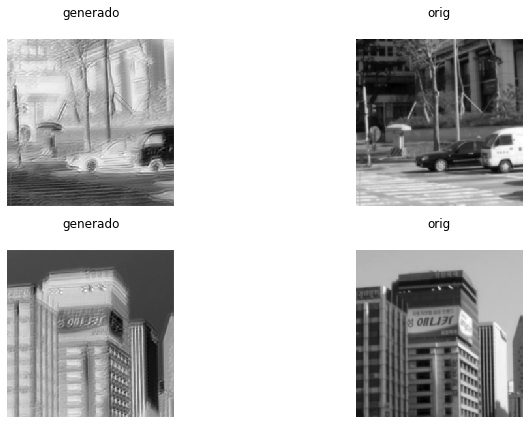

32/32 [==============================] - 1s 35ms/step
Average SSIM over 1000 images:
Reconstructed: -0.0005
Blurred Input: 0.5946
Epoch: 2, Batch: 1/46, Gen_Loss=0.000
1/1 [==============================] - 0s 11ms/step
generated


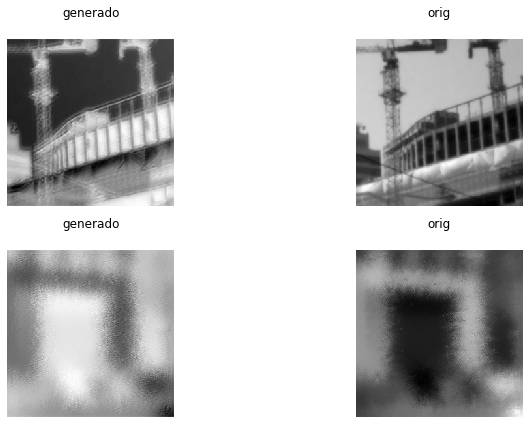

32/32 [==============================] - 1s 35ms/step
Average SSIM over 1000 images:
Reconstructed: -0.0005
Blurred Input: 0.5899
Epoch: 3, Batch: 1/46, Gen_Loss=0.000
1/1 [==============================] - 0s 11ms/step
generated


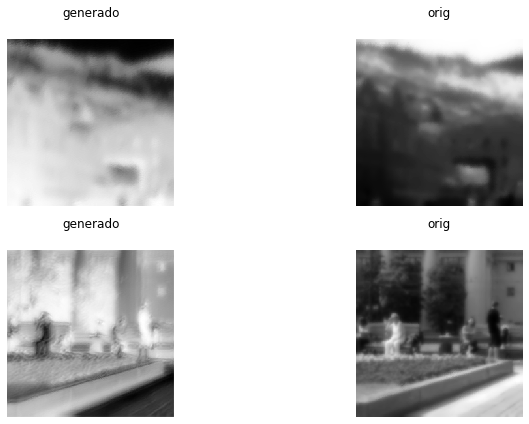

32/32 [==============================] - 1s 35ms/step
Average SSIM over 1000 images:
Reconstructed: -0.0005
Blurred Input: 0.5900
Epoch: 4, Batch: 1/46, Gen_Loss=0.000
1/1 [==============================] - 0s 11ms/step
generated


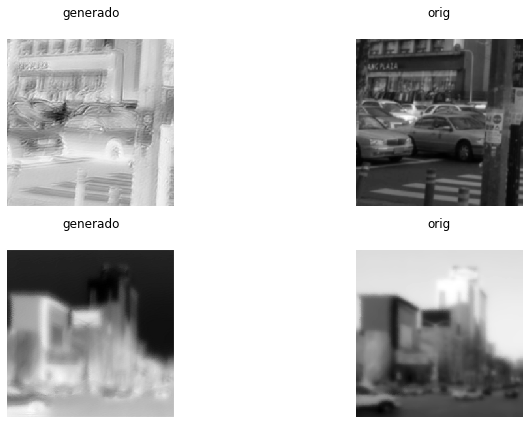

1/1 [==============================] - 0s 11ms/step


KeyboardInterrupt: 

In [83]:

indx = np.random.randint(0, len(RutasArchivos), 3000)
miniDataset=[]
for i in indx:
    miniDataset.append([RutasArchivos[i][0],RutasArchivos[i][1]])



train(gen_model, dis_model, gan_model, miniDataset)

# entrenamiento completo

Batch per epoch: 268
32/32 [==============================] - 1s 35ms/step
Average SSIM over 1000 images:
Reconstructed: -0.0008
Blurred Input: 0.5897
Epoch: 1, Batch: 1/268, Gen_Loss=0.000
1/1 [==============================] - 0s 11ms/step
generated


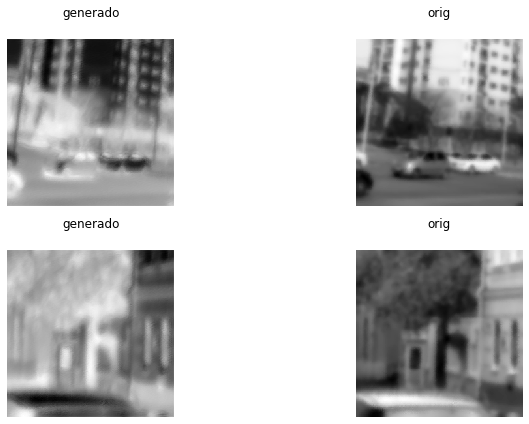

1/1 [==============================] - 0s 11ms/step


KeyboardInterrupt: 

In [84]:
train(gen_model, dis_model, gan_model, RutasArchivos)

In [86]:
# gen_model = load_model('modelos/binary_crossentropyMssimal/8_20221023_061409_modelo_generador_ssmiB-0.5779274644388854ssmiB-0.6712866684496218.h5')
gen_model = load_model('modelos/binary ssmiBienFullData/6_20221024_194317_modelo_generador_ssmiB-0.5821697390823544ssmiB-0.7026556191500388.h5')
# show_fakes(RutasArchivos,gen_model,10)
dis2_model = load_model('modeloDiscriminadorSimilaridad/similarityDiscriminator1ephoc.h5')

gen_model.summary()


OSError: No file or directory found at modelos/binary ssmiBienFullData/6_20221024_194317_modelo_generador_ssmiB-0.5821697390823544ssmiB-0.7026556191500388.h5

1/1 [==============================] - 0s 11ms/step
generated


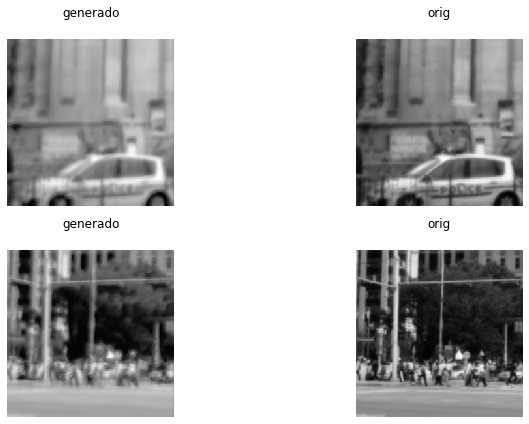

In [28]:
show_fakes(RutasArchivos,gen_model,2)

In [87]:
#evaluate results
batch = 500
quitarBorde=1
numBatch = len(RutasArchivos)/batch
mssiRecons = []
msssiBlur = []
# for i in range(0,int(numBatch)-1):
for i in range(0,10):
    inicio = i*batch
    fin = (i+1) * batch -1
    batchRutas =[]
    for j in range(inicio,fin):
        batchRutas.append([RutasArchivos[j][0],RutasArchivos[j][1]])
        
    [mssiB, mssiR] = calcularssmi(gen_model,batchRutas,batch,quitarBorde)
    mssiRecons.append(mssiR)
    msssiBlur.append(mssiB)
    print(i)
    
    

16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: -0.0008
Blurred Input: 0.6060
0
16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: -0.0041
Blurred Input: 0.6090
1
16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: -0.0014
Blurred Input: 0.5950
2
16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: -0.0034
Blurred Input: 0.6803
3
16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: -0.0021
Blurred Input: 0.6105
4
16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: -0.0040
Blurred Input: 0.6138
5
16/16 [==============================] - 1s 34ms/step
Average SSIM over 500 images:
Reconstructed: 0.0023
Blurred Input: 0.5858
6
16/16 [==============================] - 1s 35ms/step
Average SSIM over 500 images:


In [88]:
print(np.mean(mssiRecons))
print(np.mean(msssiBlur))
print('Improvement to the dataset:'+ str(100*(np.mean(mssiRecons)-np.mean(msssiBlur)))+'%')

-0.0009881453451811015
0.6017469050927773
mejora all dataset:-60.273505043795836%


In [35]:
#gen_model.save('modelosSeparadosPorCarpeta/generador-folder3.h5')

# check discriminator results


In [90]:
"""
DISCRIMINATOR EVALUATION SCRIPT

This section evaluates a GAN discriminator's performance on three types of images:
1. Real images (label 1)
2. Artificially blurred images (label 0)
3. Generator-created fake images (label 0)
"""

# ======================================================================
# 1. EVALUATE ON REAL IMAGES (Label 1)
# ======================================================================
print("\n[1] TESTING WITH REAL IMAGES (should predict close to 1)")
x_real, y_real = real_samples(RutasArchivos, 1000)  # Get 1000 real samples
real_predictions = dis_model.predict([x_real])      # Get discriminator predictions
real_mean = real_predictions.mean()                 # Calculate mean prediction
print(f"  • Mean prediction score: {real_mean:.4f} (1.0 = perfect)")
print(f"  • Prediction range: [{real_predictions.min():.4f}, {real_predictions.max():.4f}]")

# Optional training (currently commented out):
# discriminator_loss1, _ = d_model.train_on_batch(x_real, y_real)

# ======================================================================
# 2. EVALUATE ON BLURRED IMAGES (Label 0)
# ======================================================================
print("\n[2] TESTING WITH BLURRED IMAGES (should predict close to 0)")
x_blur, y_blur = latent_vector(RutasArchivos, 1000, 0)  # Get 1000 blurred samples
blur_predictions = dis_model.predict([x_blur])          # Get predictions
blur_mean = blur_predictions.mean()                     # Calculate mean
print(f"  • Mean prediction score: {blur_mean:.4f} (0.0 = perfect)")
print(f"  • Prediction range: [{blur_predictions.min():.4f}, {blur_predictions.max():.4f}]")

# ======================================================================
# 3. EVALUATE ON GENERATED FAKE IMAGES (Label 0)
# ======================================================================
print("\n[3] TESTING WITH GENERATED FAKE IMAGES (should predict close to 0)")
x_fake, y_fake, _ = fake_samples(RutasArchivos, gen_model, 10)  # Get 10 fake samples
fake_predictions = dis_model.predict([x_fake])                  # Get predictions

print("\n  • Detailed predictions for each fake sample:")
for i, (pred, label) in enumerate(zip(fake_predictions, y_fake)):
    print(f"    Sample {i+1}: Pred={pred[0]:.4f} (Label={label})")

print(f"\n  • Mean prediction score: {fake_predictions.mean():.4f} (0.0 = perfect)")

# ======================================================================
# PERFORMANCE SUMMARY
# ======================================================================
print("\n[SUMMARY] DISCRIMINATOR PERFORMANCE")
print(f"  • Real vs Blurred Separation: {real_mean - blur_mean:.4f}")
print(f"  • Real vs Fake Separation: {real_mean - fake_predictions.mean():.4f}")
print(f"  • Blurred vs Fake Separation: {blur_mean - fake_predictions.mean():.4f}")


[1] TESTING WITH REAL IMAGES (should predict close to 1)
32/32 [==============================] - 0s 3ms/step
  • Mean prediction score: 0.9825 (1.0 = perfect)
  • Prediction range: [0.0174, 1.0000]

[2] TESTING WITH BLURRED IMAGES (should predict close to 0)
32/32 [==============================] - 0s 2ms/step
  • Mean prediction score: 0.0181 (0.0 = perfect)
  • Prediction range: [0.0002, 0.6447]

[3] TESTING WITH GENERATED FAKE IMAGES (should predict close to 0)
1/1 [==============================] - 0s 12ms/step

  • Detailed predictions for each fake sample:
    Sample 1: Pred=0.0014 (Label=[0.])
    Sample 2: Pred=0.0024 (Label=[0.])
    Sample 3: Pred=0.0067 (Label=[0.])
    Sample 4: Pred=0.0025 (Label=[0.])
    Sample 5: Pred=0.0086 (Label=[0.])
    Sample 6: Pred=0.0051 (Label=[0.])
    Sample 7: Pred=0.0048 (Label=[0.])
    Sample 8: Pred=0.0025 (Label=[0.])
    Sample 9: Pred=0.0009 (Label=[0.])
    Sample 10: Pred=0.0043 (Label=[0.])

  • Mean prediction score: 0.0039 (0.

# PROCESS ENTIRE DATASET FOR MSSIM CALCULATION

In [91]:
mssiRecons = []
msssiBlur = []
batch=1
quitarBorde=1
for i in range(0,len(RutasArchivos)):
    
    imagenOrig = RutasArchivos[i][1]
    imagenBlur = RutasArchivos[i][0]
    imagen = []
    imagen.append([imagenBlur,imagenOrig])
    [mssiB, mssiR] = calcularssmi(gen_model,imagen,batch,quitarBorde)
    mssiRecons.append(mssiR)
    msssiBlur.append(mssiB)
    print(i)


1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5690
0
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0023
Blurred Input: 0.5965
1
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0021
Blurred Input: 0.5652
2
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5652
3
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0018
Blurred Input: 0.5179
4
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0014
Blurred Input: 0.4263
5
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5660
6
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0014
Blurred Input: 0

1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0016
Blurred Input: 0.5309
65
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5660
66
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0004
Blurred Input: 0.2724
67
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5085
68
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0017
Blurred Input: 0.5171
69
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5646
70
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0021
Blurred Input: 0.5818
71
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred I

KeyboardInterrupt: 

# resultados, para 203999 imagenes el 

mssi promedio de blur es 0.5765860623946355

mssi promedio reconstruido 0.6971915976655529

In [92]:
print(np.mean(mssiRecons))
print(np.mean(msssiBlur))

0.0013021852369865927
0.5010277489133141


# shhow SSIM for one image and plot

1/1 [==============================] - 0s 14ms/step
Average SSIM over 1 images:
Reconstructed: -0.0161
Blurred Input: 0.7945
/media/Data/SOTIS/Stabilized/EurasianCitiesBase/NFrames50/NLTV-LK/008-1/L4000/NLTV-LK_008-1_L=4000.000000_D=0.0540_d=0.300_Cn2=3e-17.png
1/1 [==============================] - 0s 10ms/step
(256, 256, 4)


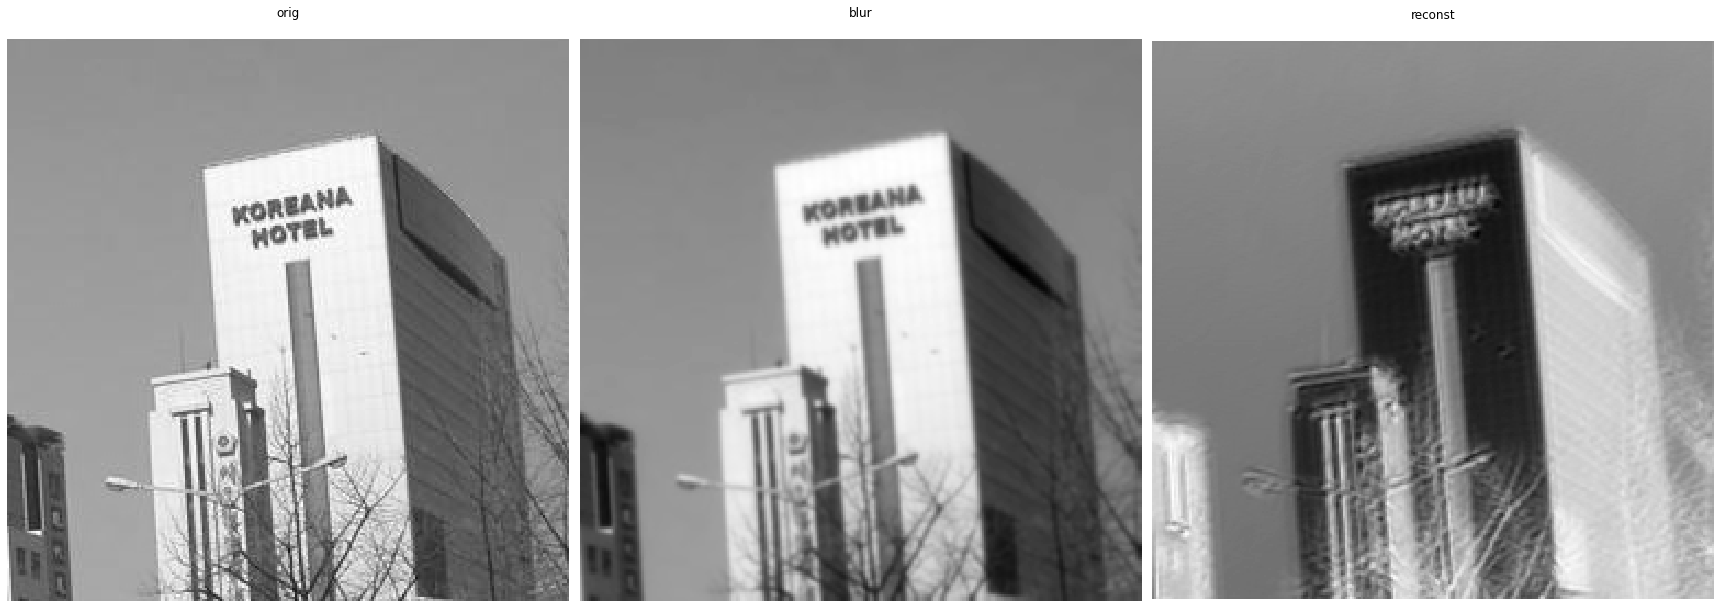

In [93]:
# nroImg = 120 #blur
nroImg = 203149   #normal
nuevos = [766]
for nroImg in nuevos:
    quitarBorde = 0
    imagenOrig = RutasArchivos[nroImg][1]
    imagenBlur = RutasArchivos[nroImg][0]
    imagen = []
    imagen.append([imagenBlur,imagenOrig])
    
    [mssiB, mssiR] = calcularssmi(gen_model,imagen,1,quitarBorde)
    print(imagenBlur)
    blur=cargarImagenes([imagenBlur])
    imagenRecons = gen_model.predict(blur)
    imagenRecons = imagenRecons.squeeze(0) 


    imagenOrig = mpimg.imread(imagenOrig)
    print(imagenOrig.shape)
    imagenBlur = mpimg.imread(imagenBlur)




# plotear las imagenes
    fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(24,10), facecolor='white')
    axs[0].matshow(imagenOrig[:][:][:], cmap='gray')
    axs[0].set(title='orig')
    axs[0].axis('off')

    axs[1].matshow(imagenBlur, cmap='gray')
    axs[1].set(title='blur')
    axs[1].axis('off')


    axs[2].matshow(imagenRecons[:][0:255][1:255], cmap='gray')
    axs[2].set(title='reconst')
    axs[2].axis('off')
    plt.show()
# 0.51231269012379 sin abajo con derecha
# 0.51231269012379 sin derecha con abajo


In [94]:
print(imagenRecons[0][255][2])
print(imagenOrig[255][255][3])
img = mpimg.imread(RutasArchivos[1][0])

img = np.array([img])
img = img.astype('float32')
img/= 255
img = img.squeeze(0) 
print(img.shape)


imgpu = cargarImagenes([RutasArchivos[1][0]])
imgpu = imgpu.squeeze(0)

print(imgpu.shape)
print(imgpu[255][255][0])
print(imgpu[255][255][1])
print(imgpu[255][255][2])



imgB,imgG,imgR = cv2.split(imgpu)
plt.imshow(imgB )
plt.show() 
plt.imshow(imgG )
plt.show() 
plt.imshow(imgR)
plt.show() 


IndexError: index 2 is out of bounds for axis 0 with size 1

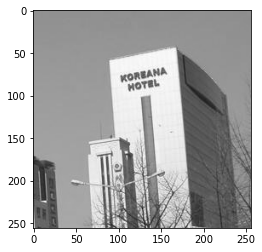

(256, 256, 4)


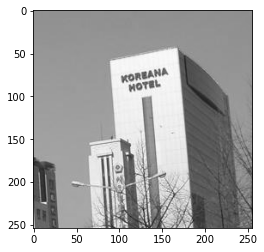

(256, 256)


In [95]:
plt.imshow(imagenOrig, cmap='gray')
plt.show() 
print(imagenOrig.shape)

plt.imshow(imagenOrig[0:254][0:254], cmap='gray')
plt.show() 
print(img.shape)


In [ ]:
# gen_model = load_model('modelos/binary_crossentropyMssimal/8_20221023_061409_modelo_generador_ssmiB-0.5779274644388854ssmiB-0.6712866684496218.h5')
gen_model = load_model('modelos/binary ssmiBienFullData/6_20221024_194317_modelo_generador_ssmiB-0.5821697390823544ssmiB-0.7026556191500388.h5')
# show_fakes(RutasArchivos,gen_model,10)
dis2_model = load_model('modeloDiscriminadorSimilaridad/similarityDiscriminator1ephoc.h5')

In [98]:
def experimentoSmmiDisc2(RutasArchivos, gen_model, dis2_model, quitarBorde):
    """
    Calculate MSSIM for the entire dataset
    
    Args:
        RutasArchivos: Array with image paths [[blurred][original],[][],[][],...]
        gen_model: The generator model
        dis2_model: Similarity discriminator that takes two images as input
        quitarBorde: Removes border if label is 1 (1=True, 0=False)
        
    Notes:
        - Border removal is only done for MSSIM measurement
        - Replaces the last row of the matrix with the penultimate row
        - For more info on why right and bottom borders are removed when measuring MSSIM,
          see the documentation in my MSSIM measurement code
    """
    mssiRecons = []
    msssiBlur = []
    accudis2 = []
    discriminatorMistakeIndx = []

    for i in range(0, len(RutasArchivos)):
        # Calculate MSSIM for the entire dataset
        imagenOrig = RutasArchivos[i][1]
        imagenBlur = RutasArchivos[i][0]
        imagen = []
        imagen.append([imagenBlur, imagenOrig])
        [mssiB, mssiR] = calcularssmi(gen_model, imagen, 1, quitarBorde)
        mssiRecons.append(mssiR)
        msssiBlur.append(mssiB)
    
        # Calculate similarity discriminator results
        XCompare, y, latent_output = fake_samples(imagen, gen_model, 1)
        XOrig = cargarImagenes([imagenOrig])
        
        # Replace bottom border with previous line to remove negative border
        if quitarBorde == 1:
            XCompare[0][255][0:256] = XCompare[0][254][0:256]
        
        # Uncomment to use similarity discriminator
        # res = dis2_model.predict([XOrig, XCompare])
        # verdadero = res > 0.5
        # if verdadero == False:
        #     discriminatorMistakeIndx.append(i)
        #     print('Similarity failed for image ', i, '-----------------------------------------------------------------------------------------------------------')
        # accudis2.append(verdadero)
        
        print(i)
    
    return [mssiRecons, msssiBlur, discriminatorMistakeIndx]
# Results are saved in discriminatorsayswrong and in .txt files within the smmis folder

# experimentos smmi con el borde del padding incluido

In [99]:
quitarBorde = 0
[mssiRecons,msssiBlur,discriminatorMistakeIndx] = experimentoSmmiDisc2(RutasArchivos,gen_model,1,quitarBorde)

1/1 [==============================] - 0s 18ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5696
1/1 [==============================] - 0s 13ms/step
0
1/1 [==============================] - 0s 12ms/step
Average SSIM over 1 images:
Reconstructed: 0.0023
Blurred Input: 0.5969
1/1 [==============================] - 0s 12ms/step
1
1/1 [==============================] - 0s 13ms/step
Average SSIM over 1 images:
Reconstructed: 0.0021
Blurred Input: 0.5656
1/1 [==============================] - 0s 13ms/step
2
1/1 [==============================] - 0s 12ms/step
Average SSIM over 1 images:
Reconstructed: 0.0019
Blurred Input: 0.5657
1/1 [==============================] - 0s 12ms/step
3
1/1 [==============================] - 0s 12ms/step
Average SSIM over 1 images:
Reconstructed: 0.0018
Blurred Input: 0.5180
1/1 [==============================] - 0s 12ms/step
4
1/1 [==============================] - 0s 12ms/step
Average SSIM over 1 images:
Reconstructed: 0.0014
Blurred 

1/1 [==============================] - 0s 10ms/step
45
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0020
Blurred Input: 0.5751
1/1 [==============================] - 0s 10ms/step
46
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0018
Blurred Input: 0.5331
1/1 [==============================] - 0s 10ms/step
47
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0007
Blurred Input: 0.3161
1/1 [==============================] - 0s 11ms/step
48
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0009
Blurred Input: 0.3456
1/1 [==============================] - 0s 10ms/step
49
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0014
Blurred Input: 0.4405
1/1 [==============================] - 0s 11ms/step
50
1/1 [==============================] - 0s 10ms/ste

1/1 [==============================] - 0s 11ms/step
91
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0016
Blurred Input: 0.6870
1/1 [==============================] - 0s 10ms/step
92
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0000
Blurred Input: 0.3262
1/1 [==============================] - 0s 10ms/step
93
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0009
Blurred Input: 0.5396
1/1 [==============================] - 0s 11ms/step
94
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0015
Blurred Input: 0.6871
1/1 [==============================] - 0s 11ms/step
95
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0015
Blurred Input: 0.6845
1/1 [==============================] - 0s 10ms/step
96
1/1 [==============================] - 0s 10ms/st

1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0015
Blurred Input: 0.6787
1/1 [==============================] - 0s 10ms/step
137
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0014
Blurred Input: 0.6356
1/1 [==============================] - 0s 11ms/step
138
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0014
Blurred Input: 0.6293
1/1 [==============================] - 0s 10ms/step
139
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0002
Blurred Input: 0.3665
1/1 [==============================] - 0s 10ms/step
140
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0012
Blurred Input: 0.5793
1/1 [==============================] - 0s 10ms/step
141
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.000

1/1 [==============================] - 0s 10ms/step
182
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0046
Blurred Input: 0.7115
1/1 [==============================] - 0s 11ms/step
183
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0035
Blurred Input: 0.6218
1/1 [==============================] - 0s 10ms/step
184
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0044
Blurred Input: 0.7001
1/1 [==============================] - 0s 10ms/step
185
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0024
Blurred Input: 0.4700
1/1 [==============================] - 0s 10ms/step
186
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0047
Blurred Input: 0.7188
1/1 [==============================] - 0s 11ms/step
187
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0040
Blurred Input: 0.6701
1/1 [==============================] - 0s 10ms/step
228
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0046
Blurred Input: 0.7107
1/1 [==============================] - 0s 10ms/step
229
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0036
Blurred Input: 0.6353
1/1 [==============================] - 0s 11ms/step
230
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0046
Blurred Input: 0.7234
1/1 [==============================] - 0s 10ms/step
231
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0045
Blurred Input: 0.7044
1/1 [==============================] - 0s 10ms/step
232
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.001

1/1 [==============================] - 0s 10ms/step
273
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0005
Blurred Input: 0.3976
1/1 [==============================] - 0s 10ms/step
274
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0001
Blurred Input: 0.4519
1/1 [==============================] - 0s 10ms/step
275
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0006
Blurred Input: 0.6434
1/1 [==============================] - 0s 10ms/step
276
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0007
Blurred Input: 0.6492
1/1 [==============================] - 0s 10ms/step
277
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: -0.0004
Blurred Input: 0.4143
1/1 [==============================] - 0s 11ms/step
278
1/1 [==============================] - 0s

1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0006
Blurred Input: 0.6381
1/1 [==============================] - 0s 10ms/step
319
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0003
Blurred Input: 0.3437
1/1 [==============================] - 0s 11ms/step
320
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0010
Blurred Input: 0.4265
1/1 [==============================] - 0s 10ms/step
321
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0020
Blurred Input: 0.7100
1/1 [==============================] - 0s 11ms/step
322
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0020
Blurred Input: 0.7102
1/1 [==============================] - 0s 11ms/step
323
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.001

1/1 [==============================] - 0s 11ms/step
364
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0000
Blurred Input: 0.2778
1/1 [==============================] - 0s 10ms/step
365
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0000
Blurred Input: 0.2951
1/1 [==============================] - 0s 11ms/step
366
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0016
Blurred Input: 0.5207
1/1 [==============================] - 0s 11ms/step
367
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: 0.0022
Blurred Input: 0.7183
1/1 [==============================] - 0s 10ms/step
368
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 0.0022
Blurred Input: 0.7063
1/1 [==============================] - 0s 11ms/step
369
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0137
Blurred Input: 0.8252
1/1 [==============================] - 0s 11ms/step
410
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0129
Blurred Input: 0.8481
1/1 [==============================] - 0s 10ms/step
411
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: -0.0147
Blurred Input: 0.6754
1/1 [==============================] - 0s 11ms/step
412
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0132
Blurred Input: 0.8428
1/1 [==============================] - 0s 11ms/step
413
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0131
Blurred Input: 0.8488
1/1 [==============================] - 0s 11ms/step
414
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: 

Average SSIM over 1 images:
Reconstructed: -0.0141
Blurred Input: 0.7848
1/1 [==============================] - 0s 10ms/step
455
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0131
Blurred Input: 0.8512
1/1 [==============================] - 0s 10ms/step
456
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0139
Blurred Input: 0.6787
1/1 [==============================] - 0s 10ms/step
457
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0131
Blurred Input: 0.8491
1/1 [==============================] - 0s 11ms/step
458
1/1 [==============================] - 0s 10ms/step
Average SSIM over 1 images:
Reconstructed: -0.0130
Blurred Input: 0.8521
1/1 [==============================] - 0s 10ms/step
459
1/1 [==============================] - 0s 11ms/step
Average SSIM over 1 images:
Reconstructed: -0.0136
Blurred Input: 0.8275
1/1 [=================

KeyboardInterrupt: 

In [ ]:
# esto es cuando compara la blured contra la original
discriminatorSaysWrongBlured = [358, 395, 5354, 14540, 25840, 27958, 27965, 27966, 27978, 29052, 29056, 29074, 29080, 29082, 40876, 40878, 41354, 41359, 41383, 41389, 41392, 52166, 52188, 84869, 94873, 96010, 96026, 100938, 102306, 102314, 102325, 111144, 123468, 142784, 143125, 144528, 144544, 161051, 167760, 171320, 172520, 178004, 178038, 178039, 187121, 189863, 189868, 189869, 189882, 198302, 198315, 198318, 198321, 198323, 198331, 198346, 203107, 203110, 203117, 203119, 203135, 203142, 203148]

In [ ]:
# some results
smmireconstruccionConBordeInfNegro = 0.6971915976655529
smmiAlldatasetBlured = 0.5765860623946355

# experimentos smmi SIN el borde del padding incluido

In [100]:
#estos esperimentos se deben correr y al terminar se corre lo de guardar el .txt para que todo quede asegurado
quitarBorde = 1
mssiRecons,msssiBlur,discriminatorMistakeIndx = experimentoSmmiDisc2(RutasArchivos,gen_model,dis2_model,quitarBorde)

NameError: name 'dis2_model' is not defined

In [101]:
print(discriminatorMistakeIndx)

NameError: name 'discriminatorMistakeIndx' is not defined

In [102]:
discriminatorSaidWrongGenerada= [355, 358, 361, 381, 389, 391, 395, 5350, 5354, 5360, 5364, 5365, 5369, 5372, 5374, 5376, 5380, 5383, 5385, 5389, 5390, 7510, 10810, 10815, 10821, 10824, 10847, 10848, 14518, 23786, 25840, 27952, 27958, 27965, 27966, 27969, 27978, 27999, 29052, 29056, 29074, 29080, 29082, 39402, 39407, 39408, 39409, 39410, 39413, 39414, 39417, 39419, 39420, 39421, 39422, 39424, 39425, 39426, 39427, 39429, 39431, 39432, 39433, 39435, 39436, 39437, 39438, 39439, 39440, 39442, 39443, 39444, 39445, 39446, 40850, 40852, 40854, 40855, 40864, 40865, 40866, 40868, 40869, 40870, 40873, 40874, 40875, 40876, 40878, 40879, 40881, 40886, 40889, 40890, 40891, 40892, 40893, 40894, 40897, 40898, 40899, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41358, 41359, 41360, 41361, 41362, 41363, 41364, 41366, 41367, 41368, 41369, 41370, 41371, 41372, 41373, 41374, 41375, 41376, 41377, 41378, 41379, 41381, 41382, 41383, 41385, 41386, 41387, 41388, 41389, 41390, 41391, 41392, 41393, 41394, 41395, 41396, 41397, 41398, 41399, 52151, 52156, 52157, 52164, 52166, 52183, 52188, 56790, 84852, 84854, 84857, 84860, 84862, 84864, 84868, 84869, 84873, 84874, 84882, 84891, 84895, 84899, 85662, 96003, 96010, 96020, 96024, 96026, 96032, 96033, 98291, 99295, 99690, 100918, 100938, 100941, 101503, 101519, 101541, 102306, 102325, 103630, 109755, 109784, 111113, 111144, 113567, 120585, 133457, 133490, 141848, 142751, 142752, 142754, 142755, 142761, 142765, 142766, 142771, 142772, 142774, 142775, 142777, 142780, 142784, 142789, 142795, 142797, 143125, 144501, 144504, 144508, 144513, 144517, 144519, 144521, 144524, 144527, 144528, 144529, 144531, 144532, 144539, 144542, 144544, 144548, 145156, 145163, 145167, 145177, 145192, 145897, 153167, 153180, 158053, 158070, 159646, 161051, 161052, 161056, 161066, 161071, 163902, 163923, 163926, 163944, 163946, 167760, 168963, 171320, 178038, 178039, 178040, 186468, 186485, 186490, 187100, 187121, 188612, 188632, 188637, 189622, 189851, 189856, 189858, 189863, 189864, 189868, 189869, 189874, 189875, 189876, 189881, 189882, 189884, 189886, 189887, 189893, 189894, 189895, 198300, 198301, 198302, 198303, 198304, 198305, 198306, 198307, 198308, 198309, 198310, 198311, 198312, 198313, 198314, 198315, 198316, 198317, 198318, 198319, 198320, 198321, 198322, 198323, 198324, 198326, 198327, 198328, 198329, 198330, 198331, 198332, 198333, 198334, 198335, 198336, 198338, 198339, 198340, 198341, 198342, 198343, 198344, 198345, 198346, 198347, 198348, 198349, 198667, 198669, 198678, 198698, 199562, 199565, 199567, 199595, 203100, 203101, 203102, 203103, 203104, 203105, 203106, 203107, 203108, 203109, 203110, 203111, 203112, 203114, 203116, 203117, 203118, 203119, 203120, 203121, 203123, 203124, 203125, 203126, 203127, 203128, 203129, 203130, 203131, 203132, 203133, 203134, 203135, 203136, 203137, 203138, 203139, 203140, 203141, 203142, 203143, 203144, 203145, 203146, 203148, 203149]

In [103]:
with open("smmiBlured.txt", "w") as txt_file:
    for line in msssiBlur:
        txt_file.write("".join(str(line)) + "\n")
        
with open("smmiRecons.txt", "w") as txt_file:
    for line in mssiRecons:
        txt_file.write("".join(str(line)) + "\n")

In [ ]:
print(msssiBlur[0])

In [ ]:
# resultados obtenidos , no correr/ solo leer los numeros que yo escrib
smmireconstruccionSinBordeInfNegro = 0.6997665558628827
smmiAlldatasetBlured = 0.5762508476326006

# For visualization and further analysis, I'll use the borderless results which give me a higher SSIM score.



In [104]:
msssiBlur=[]
with open("arreglosSmmiRedkernel3Borde/smmiBlured.txt") as f:
    for line in f:
        msssiBlur.append(float(line))

        if 'str' in line:
            break
print(len(msssiBlur))

mssiRecons=[]
with open("arreglosSmmiRedkernel3Borde/smmiRecons.txt") as f:
    for line in f:
        mssiRecons.append(float(line))

        if 'str' in line:
            break
            
print(len(mssiRecons))

FileNotFoundError: [Errno 2] No such file or directory: 'arreglosSmmiRedkernel3Borde/smmiBlured.txt'

In [107]:
diccCBlured={1e-17: [],3e-17: [],5e-17: [],7e-17: [],9e-17: [],1e-16: [],3e-16: [],5e-16: [],7e-16: [],9e-16: [], 1e-15: [],3e-15: [],5e-15: [],7e-15: [],9e-15: [],1e-14: [],3e-14: [],5e-14: [],7e-14: [],9e-14: []}
diccCRecons={1e-17: [],3e-17: [],5e-17: [],7e-17: [],9e-17: [],1e-16: [],3e-16: [],5e-16: [],7e-16: [],9e-16: [], 1e-15: [],3e-15: [],5e-15: [],7e-15: [],9e-15: [],1e-14: [],3e-14: [],5e-14: [],7e-14: [],9e-14: []}
estratiMssi = [[],[],[],[],[],[],[],[],[],[]]
estratiPromBlur=  [[],[],[],[],[],[],[],[],[],[]]

arrLBlured = [[],[],[],[]]
arrLRecons = [[],[],[],[]]

for i in range(0,len(RutasArchivos)):
    [L,C] = encontrarLyC(RutasArchivos[i][0])
    imgMssiReco = float(mssiRecons[i])
    imgMssiBlur = float(msssiBlur[i])
    
    
    
    diccCBlured[float(C)].append(imgMssiBlur)
    diccCRecons[float(C)].append(imgMssiReco)

    
    arrLBlured[int(L)-1].append(imgMssiBlur)
    arrLRecons[int(L)-1].append(imgMssiReco)
    
    if imgMssiBlur<=0.1:
        #de (0 a 0.1]
        estratiMssi[0].append(imgMssiReco)
        estratiPromBlur[0].append(imgMssiBlur)
    else:   
        if imgMssiBlur<=0.2:
            #de (0 a 0.2]
            estratiMssi[1].append(imgMssiReco)
            estratiPromBlur[1].append(imgMssiBlur)
        else:
            #de (0.2 a 0.3]
            if imgMssiBlur<=0.3:
                estratiMssi[2].append(imgMssiReco)
                estratiPromBlur[2].append(imgMssiBlur)
            else:
            #de (0.3 a 0.4]
                if imgMssiBlur<=0.4:
                    estratiMssi[3].append(imgMssiReco)
                    estratiPromBlur[3].append(imgMssiBlur)
                else:
                    #de (0.4 a 0.5]
                    if imgMssiBlur<=0.5:
                        estratiMssi[4].append(imgMssiReco) 
                        estratiPromBlur[4].append(imgMssiBlur)
                    else:
                        #de (0.5 a 0.6]
                        if imgMssiBlur<=0.6:
                            estratiMssi[5].append(imgMssiReco)
                            estratiPromBlur[5].append(imgMssiBlur)
                        else:
                            #de (0.6 a 0.7]
                            if imgMssiBlur<=0.7:
                                estratiMssi[6].append(imgMssiReco)
                                estratiPromBlur[6].append(imgMssiBlur)
                            else:
                                #de (0.7 a 0.8]
                                if imgMssiBlur<=0.8:
                                    estratiMssi[7].append(imgMssiReco)
                                    estratiPromBlur[7].append(imgMssiBlur)
                                else:
                                    #de (0.8 a 0.9]
                                    if imgMssiBlur<=0.9:
                                        estratiMssi[8].append(imgMssiReco)
                                        estratiPromBlur[8].append(imgMssiBlur)
                                    else:
                                        #de (0.9 a 1]
                                        if imgMssiBlur<=1:
                                            estratiMssi[9].append(imgMssiReco)
                                            estratiPromBlur[9].append(imgMssiBlur)
                                        else:
                                            print('errorrrrrrr')
                                    
                                    
    
    

for i in diccCBlured:
    print('C=',i,'\n blured: ',np.mean(diccCBlured[i]),'\n reconst: ',np.mean(diccCRecons[i]))


for i in range(0,4):
    print('L= ',i,'\n blured',np.mean(arrLBlured[i]), '\n reconst: ',np.mean(arrLRecons[i]))
    
for i in range(0,10):
    print('class',i,'-',i+1,'promBlur', np.mean(estratiPromBlur[i]),'prom recons', np.mean(estratiMssi[i]), ' cantidadElem = ', len(estratiMssi[i]))
    

IndexError: list index out of range

In [ ]:
[355, 358, 361, 381, 389, 391, 395, 5350, 5354, 5360, 5364, 5365, 5369, 5372, 5374, 5376, 5380, 5383, 5385, 5389, 5390, 7510, 10810, 10815, 10821, 10824, 10847, 10848, 14518, 23786, 25840, 27952, 27958, 27965, 27966, 27969, 27978, 27999, 29052, 29056, 29074, 29080, 29082, 39402, 39407, 39408, 39409, 39410, 39413, 39414, 39417, 39419, 39420, 39421, 39422, 39424, 39425, 39426, 39427, 39429, 39431, 39432, 39433, 39435, 39436, 39437, 39438, 39439, 39440, 39442, 39443, 39444, 39445, 39446, 40850, 40852, 40854, 40855, 40864, 40865, 40866, 40868, 40869, 40870, 40873, 40874, 40875, 40876, 40878, 40879, 40881, 40886, 40889, 40890, 40891, 40892, 40893, 40894, 40897, 40898, 40899, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41358, 41359, 41360, 41361, 41362, 41363, 41364, 41366, 41367, 41368, 41369, 41370, 41371, 41372, 41373, 41374, 41375, 41376, 41377, 41378, 41379, 41381, 41382, 41383, 41385, 41386, 41387, 41388, 41389, 41390, 41391, 41392, 41393, 41394, 41395, 41396, 41397, 41398, 41399, 52151, 52156, 52157, 52164, 52166, 52183, 52188, 56790, 84852, 84854, 84857, 84860, 84862, 84864, 84868, 84869, 84873, 84874, 84882, 84891, 84895, 84899, 85662, 96003, 96010, 96020, 96024, 96026, 96032, 96033, 98291, 99295, 99690, 100918, 100938, 100941, 101503, 101519, 101541, 102306, 102325, 103630, 109755, 109784, 111113, 111144, 113567, 120585, 133457, 133490, 141848, 142751, 142752, 142754, 142755, 142761, 142765, 142766, 142771, 142772, 142774, 142775, 142777, 142780, 142784, 142789, 142795, 142797, 143125, 144501, 144504, 144508, 144513, 144517, 144519, 144521, 144524, 144527, 144528, 144529, 144531, 144532, 144539, 144542, 144544, 144548, 145156, 145163, 145167, 145177, 145192, 145897, 153167, 153180, 158053, 158070, 159646, 161051, 161052, 161056, 161066, 161071, 163902, 163923, 163926, 163944, 163946, 167760, 168963, 171320, 178038, 178039, 178040, 186468, 186485, 186490, 187100, 187121, 188612, 188632, 188637, 189622, 189851, 189856, 189858, 189863, 189864, 189868, 189869, 189874, 189875, 189876, 189881, 189882, 189884, 189886, 189887, 189893, 189894, 189895, 198300, 198301, 198302, 198303, 198304, 198305, 198306, 198307, 198308, 198309, 198310, 198311, 198312, 198313, 198314, 198315, 198316, 198317, 198318, 198319, 198320, 198321, 198322, 198323, 198324, 198326, 198327, 198328, 198329, 198330, 198331, 198332, 198333, 198334, 198335, 198336, 198338, 198339, 198340, 198341, 198342, 198343, 198344, 198345, 198346, 198347, 198348, 198349, 198667, 198669, 198678, 198698, 199562, 199565, 199567, 199595, 203100, 203101, 203102, 203103, 203104, 203105, 203106, 203107, 203108, 203109, 203110, 203111, 203112, 203114, 203116, 203117, 203118, 203119, 203120, 203121, 203123, 203124, 203125, 203126, 203127, 203128, 203129, 203130, 203131, 203132, 203133, 203134, 203135, 203136, 203137, 203138, 203139, 203140, 203141, 203142, 203143, 203144, 203145, 203146, 203148, 203149]

resultado de los exp sin borde

C= 1e-17 
 blured:  0.6973573673449253 
 reconst:  0.9278777344029135
C= 3e-17 
 blured:  0.6963061005329108 
 reconst:  0.920060824937377
C= 5e-17 
 blured:  0.6946729573569161 
 reconst:  0.9121638689604205
C= 7e-17 
 blured:  0.693675265754486 
 reconst:  0.9053007057734562
C= 9e-17 
 blured:  0.6918861336182984 
 reconst:  0.8996420935935401
C= 1e-16 
 blured:  0.691314211786552 
 reconst:  0.8971051936729008
C= 3e-16 
 blured:  0.6823407055030131 
 reconst:  0.8573914190972859
C= 5e-16 
 blured:  0.6711840137536582 
 reconst:  0.8258301975788256
C= 7e-16 
 blured:  0.6632017471690594 
 reconst:  0.8015750733743737
C= 9e-16 
 blured:  0.655498768701954 
 reconst:  0.7800085849781301
C= 1e-15 
 blured:  0.650788553241506 
 reconst:  0.7696509528459394
C= 3e-15 
 blured:  0.5847179768142642 
 reconst:  0.6570751841973587
C= 5e-15 
 blured:  0.5429390615051393 
 reconst:  0.6018786798088059
C= 7e-15 
 blured:  0.5126582506863983 
 reconst:  0.5656797403404099
C= 9e-15 
 blured:  0.49002036463511667 
 reconst:  0.5405209040439106
C= 1e-14 
 blured:  0.4821667852757865 
 reconst:  0.531427774997084
C= 3e-14 
 blured:  0.39507918476973813 
 reconst:  0.440660375915535
C= 5e-14 
 blured:  0.3612707381202358 
 reconst:  0.40594585819403495
C= 7e-14 
 blured:  0.34087928912270327 
 reconst:  0.3850089425603802
C= 9e-14 
 blured:  0.3270594769593524 
 reconst:  0.37052700798497296
L=  0 
 blured 0.6113722549281336 
 reconst:  0.7547940921946995
L=  1 
 blured 0.5836211114879615 
 reconst:  0.7111645844874444
L=  2 
 blured 0.5632977346266455 
 reconst:  0.6796445949359976
L=  3 
 blured 0.5467122894876623 
 reconst:  0.65346295183339
class 0 - 1 promBlur nan prom recons nan  cantidadElem =  0
class 1 - 2 promBlur 0.18235616258589854 prom recons 0.2284360177575197  cantidadElem =  1730
class 2 - 3 promBlur 0.2561864080589977 prom recons 0.30231257097854514  cantidadElem =  13622
class 3 - 4 promBlur 0.35206031167110285 prom recons 0.4058069250388277  cantidadElem =  21520
class 4 - 5 promBlur 0.4506020317732716 prom recons 0.5236081912354581  cantidadElem =  24578
class 5 - 6 promBlur 0.5534407765410946 prom recons 0.6863019085926156  cantidadElem =  32978
class 6 - 7 promBlur 0.6544073885138848 prom recons 0.8334875933870811  cantidadElem =  58332
class 7 - 8 promBlur 0.7427747761448648 prom recons 0.8822449071827173  cantidadElem =  44588
class 8 - 9 promBlur 0.8350495682926726 prom recons 0.909168378207859  cantidadElem =  6640
class 9 - 10 promBlur 0.9048577780777892 prom recons 0.8831250526240576  cantidadElem =  12

In [106]:
def encontrarLyC(ruta):
    arrRuta = re.split('_',ruta)
    StringL = re.split('=',arrRuta[1])
    L = StringL[1]
    StringC = re.split('=',arrRuta[4])
    StringC = re.split('.m',StringC[1])
    C = StringC[0]
    return [L[0],C]





In [ ]:
a=[]
for i in discriminatorSaidWrongGenerada:
    a.append(np.max(mssiRecons[i]))
#     print(np.max(mssiRecons[i]))
print(np.where(a==np.max(a)))
print(discriminatorSaidWrongGenerada[198])

In [105]:
#para ver similaridad
discriminatorSaysWrongBlured = [358, 395, 5354, 14540, 25840, 27958, 27965, 27966, 27978, 29052, 29056, 29074, 29080, 29082, 40876, 40878, 41354, 41359, 41383, 41389, 41392, 52166, 52188, 84869, 94873, 96010, 96026, 100938, 102306, 102314, 102325, 111144, 123468, 142784, 143125, 144528, 144544, 161051, 167760, 171320, 172520, 178004, 178038, 178039, 187121, 189863, 189868, 189869, 189882, 198302, 198315, 198318, 198321, 198323, 198331, 198346, 203107, 203110, 203117, 203119, 203135, 203142, 203148]
discriminatorSaidWrongGenerada= [355, 358, 361, 381, 389, 391, 395, 5350, 5354, 5360, 5364, 5365, 5369, 5372, 5374, 5376, 5380, 5383, 5385, 5389, 5390, 7510, 10810, 10815, 10821, 10824, 10847, 10848, 14518, 23786, 25840, 27952, 27958, 27965, 27966, 27969, 27978, 27999, 29052, 29056, 29074, 29080, 29082, 39402, 39407, 39408, 39409, 39410, 39413, 39414, 39417, 39419, 39420, 39421, 39422, 39424, 39425, 39426, 39427, 39429, 39431, 39432, 39433, 39435, 39436, 39437, 39438, 39439, 39440, 39442, 39443, 39444, 39445, 39446, 40850, 40852, 40854, 40855, 40864, 40865, 40866, 40868, 40869, 40870, 40873, 40874, 40875, 40876, 40878, 40879, 40881, 40886, 40889, 40890, 40891, 40892, 40893, 40894, 40897, 40898, 40899, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41358, 41359, 41360, 41361, 41362, 41363, 41364, 41366, 41367, 41368, 41369, 41370, 41371, 41372, 41373, 41374, 41375, 41376, 41377, 41378, 41379, 41381, 41382, 41383, 41385, 41386, 41387, 41388, 41389, 41390, 41391, 41392, 41393, 41394, 41395, 41396, 41397, 41398, 41399, 52151, 52156, 52157, 52164, 52166, 52183, 52188, 56790, 84852, 84854, 84857, 84860, 84862, 84864, 84868, 84869, 84873, 84874, 84882, 84891, 84895, 84899, 85662, 96003, 96010, 96020, 96024, 96026, 96032, 96033, 98291, 99295, 99690, 100918, 100938, 100941, 101503, 101519, 101541, 102306, 102325, 103630, 109755, 109784, 111113, 111144, 113567, 120585, 133457, 133490, 141848, 142751, 142752, 142754, 142755, 142761, 142765, 142766, 142771, 142772, 142774, 142775, 142777, 142780, 142784, 142789, 142795, 142797, 143125, 144501, 144504, 144508, 144513, 144517, 144519, 144521, 144524, 144527, 144528, 144529, 144531, 144532, 144539, 144542, 144544, 144548, 145156, 145163, 145167, 145177, 145192, 145897, 153167, 153180, 158053, 158070, 159646, 161051, 161052, 161056, 161066, 161071, 163902, 163923, 163926, 163944, 163946, 167760, 168963, 171320, 178038, 178039, 178040, 186468, 186485, 186490, 187100, 187121, 188612, 188632, 188637, 189622, 189851, 189856, 189858, 189863, 189864, 189868, 189869, 189874, 189875, 189876, 189881, 189882, 189884, 189886, 189887, 189893, 189894, 189895, 198300, 198301, 198302, 198303, 198304, 198305, 198306, 198307, 198308, 198309, 198310, 198311, 198312, 198313, 198314, 198315, 198316, 198317, 198318, 198319, 198320, 198321, 198322, 198323, 198324, 198326, 198327, 198328, 198329, 198330, 198331, 198332, 198333, 198334, 198335, 198336, 198338, 198339, 198340, 198341, 198342, 198343, 198344, 198345, 198346, 198347, 198348, 198349, 198667, 198669, 198678, 198698, 199562, 199565, 199567, 199595, 203100, 203101, 203102, 203103, 203104, 203105, 203106, 203107, 203108, 203109, 203110, 203111, 203112, 203114, 203116, 203117, 203118, 203119, 203120, 203121, 203123, 203124, 203125, 203126, 203127, 203128, 203129, 203130, 203131, 203132, 203133, 203134, 203135, 203136, 203137, 203138, 203139, 203140, 203141, 203142, 203143, 203144, 203145, 203146, 203148, 203149]
nuevos = []
for i in discriminatorSaidWrongGenerada:

    if i not in discriminatorSaysWrongBlured:
        nuevos.append(i)
        
print(nuevos)

[355, 361, 381, 389, 391, 5350, 5360, 5364, 5365, 5369, 5372, 5374, 5376, 5380, 5383, 5385, 5389, 5390, 7510, 10810, 10815, 10821, 10824, 10847, 10848, 14518, 23786, 27952, 27969, 27999, 39402, 39407, 39408, 39409, 39410, 39413, 39414, 39417, 39419, 39420, 39421, 39422, 39424, 39425, 39426, 39427, 39429, 39431, 39432, 39433, 39435, 39436, 39437, 39438, 39439, 39440, 39442, 39443, 39444, 39445, 39446, 40850, 40852, 40854, 40855, 40864, 40865, 40866, 40868, 40869, 40870, 40873, 40874, 40875, 40879, 40881, 40886, 40889, 40890, 40891, 40892, 40893, 40894, 40897, 40898, 40899, 41350, 41351, 41352, 41353, 41355, 41356, 41357, 41358, 41360, 41361, 41362, 41363, 41364, 41366, 41367, 41368, 41369, 41370, 41371, 41372, 41373, 41374, 41375, 41376, 41377, 41378, 41379, 41381, 41382, 41385, 41386, 41387, 41388, 41390, 41391, 41393, 41394, 41395, 41396, 41397, 41398, 41399, 52151, 52156, 52157, 52164, 52183, 56790, 84852, 84854, 84857, 84860, 84862, 84864, 84868, 84873, 84874, 84882, 84891, 84895, 8